<a href="https://colab.research.google.com/github/piyushrgone/Stock-Market-Analysis-with-prediction-using-LSTM/blob/main/Stock_Market_Analysis_with_prediction_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Project - Stock Market Analysis

1.) What was the change in price of the stock over time?

2.) What was the daily return of the stock on average?

3.) What was the moving average of the various stocks?

4.) What was the correlation between different stocks'?

5.) How much value do we put at risk by investing in a particular stock?

6.) How can we attempt to predict future stock behavior? (Predicting the closing price stock price of INDI inc using LSTM)

## Importing Data from Yahoo Finance



In [ ]:
!pip install -q yfinance

In [ ]:
import yfinance as yf
#yf.set_tz_cache_location("custom/cache/location")
#...

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr

yf.pdr_override()

### Imports

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

## Testing one stock "Microsoft"

In [ ]:
msft = yf.Ticker("MSFT")

# get all stock info
msft.info

In [ ]:
# get historical market data
hist = msft.history(period="1mo")

# show meta information about the history (requires history() to be called first)
msft.history_metadata

In [ ]:
# show actions (dividends, splits, capital gains)
msft.actions
msft.dividends
msft.splits
msft.capital_gains  # only for mutual funds & etfs

# show share count
msft.get_shares_full(start="2022-01-01", end=None)

In [ ]:
# show financials:
# - income statement
msft.income_stmt
msft.quarterly_income_stmt

,2023-03-31,2022-12-31,2022-09-30,2022-06-30
Tax Effect Of Unusual Items,0.0,0.0,-10640000.0,0.0
Tax Rate For Calcs,0.192917,0.192438,0.19,0.182896
Normalized EBITDA,25901000000.0,24047000000.0,24918000000.0,24513000000.0
Total Unusual Items,162000000.0,-232000000.0,-56000000.0,-80000000.0
Total Unusual Items Excluding Goodwill,162000000.0,-232000000.0,-56000000.0,-80000000.0
Net Income From Continuing Operation Net Minority Interest,18299000000.0,16425000000.0,17556000000.0,16740000000.0
Reconciled Depreciation,3549000000.0,3648000000.0,2790000000.0,3979000000.0
Reconciled Cost Of Revenue,16128000000.0,17488000000.0,15452000000.0,16429000000.0
EBIT,22352000000.0,20399000000.0,22072000000.0,20534000000.0
Net Interest Income,252000000.0,210000000.0,141000000.0,56000000.0


In [ ]:
# - balance sheet
msft.balance_sheet
msft.quarterly_balance_sheet

,2023-03-31,2022-12-31,2022-09-30,2022-06-30
Ordinary Shares Number,7437000000.0,7447000000.0,7457000000.0,7464000000.0
Share Issued,7437000000.0,7447000000.0,7457000000.0,7464000000.0
Net Debt,21648000000.0,32470000000.0,25738000000.0,35850000000.0
Total Debt,60522000000.0,60114000000.0,60282000000.0,61270000000.0
Tangible Book Value,116864000000.0,104877000000.0,95299000000.0,87720000000.0
...,...,...,...,...
Cash Cash Equivalents And Short Term Investments,104427000000.0,99508000000.0,107244000000.0,104757000000.0
Other Short Term Investments,77865000000.0,83862000000.0,84360000000.0,90826000000.0
Cash And Cash Equivalents,26562000000.0,15646000000.0,22884000000.0,13931000000.0
Cash Equivalents,18053000000.0,8342000000.0,15647000000.0,5673000000.0


In [ ]:
# - cash flow statement
msft.cashflow

,2022-06-30,2021-06-30,2020-06-30
Free Cash Flow,65149000000.0,56118000000.0,45234000000.0
Repurchase Of Capital Stock,-32696000000.0,-27385000000.0,-22968000000.0
Repayment Of Debt,-9023000000.0,-3750000000.0,-5518000000.0
Issuance Of Debt,NaN,NaN,0.0
Issuance Of Capital Stock,1841000000.0,1693000000.0,1343000000.0
Capital Expenditure,-23886000000.0,-20622000000.0,-15441000000.0
End Cash Position,13931000000.0,14224000000.0,13576000000.0
Beginning Cash Position,14224000000.0,13576000000.0,11356000000.0
Effect Of Exchange Rate Changes,-141000000.0,-29000000.0,-201000000.0
Changes In Cash,-152000000.0,677000000.0,2421000000.0


In [ ]:
msft.quarterly_cashflow

,2023-03-31,2022-12-31,2022-09-30,2022-06-30
Free Cash Flow,17834000000.0,4899000000.0,16915000000.0,17758000000.0
Repurchase Of Capital Stock,-5509000000.0,-5459000000.0,-5573000000.0,-8757000000.0
Repayment Of Debt,0.0,-750000000.0,-1000000000.0,0.0
Issuance Of Capital Stock,536000000.0,243000000.0,575000000.0,461000000.0
Capital Expenditure,-6607000000.0,-6274000000.0,-6283000000.0,-6871000000.0
End Cash Position,26562000000.0,15646000000.0,22884000000.0,13931000000.0
Beginning Cash Position,15646000000.0,22884000000.0,13931000000.0,12498000000.0
Effect Of Exchange Rate Changes,29000000.0,88000000.0,-230000000.0,-198000000.0
Changes In Cash,10887000000.0,-7326000000.0,9183000000.0,1631000000.0
Financing Cash Flow,-10290000000.0,-11349000000.0,-10883000000.0,-13269000000.0


In [ ]:
#to show holders
msft.major_holders

,0,1
0,0.05%,% of Shares Held by All Insider
1,73.77%,% of Shares Held by Institutions
2,73.80%,% of Float Held by Institutions
3,6159,Number of Institutions Holding Shares


In [ ]:
msft.institutional_holders

,Holder,Shares,Date Reported,% Out,Value
0,"Vanguard Group, Inc. (The)",649516597,2023-03-30,0.0874,221186387492
1,Blackrock Inc.,537573096,2023-03-30,0.0723,183065146705
2,State Street Corporation,292106885,2023-03-30,0.0393,99474081113
3,"FMR, LLC",200523373,2023-03-30,0.0270,68286231154
4,Price (T.Rowe) Associates Inc,166035734,2023-03-30,0.0223,56541810275
5,"Geode Capital Management, LLC",144365760,2023-03-30,0.0194,49162317143
6,Morgan Stanley,120316895,2023-03-30,0.0162,40972716451
7,JP Morgan Chase & Company,94617741,2023-03-30,0.0127,32221126328
8,Capital World Investors,87608980,2023-03-30,0.0118,29834362797
9,Norges Bank Investment Management,86316926,2022-12-30,0.0116,29394366717


In [ ]:
msft.mutualfund_holders

,Holder,Shares,Date Reported,% Out,Value
0,Vanguard Total Stock Market Index Fund,226594602,2022-12-30,0.0304,77164527701
1,Vanguard 500 Index Fund,172326589,2022-12-30,0.0232,58684098090
2,Fidelity 500 Index Fund,81720092,2023-02-27,0.0110,27828960827
3,SPDR S&P 500 ETF Trust,80591530,2023-03-30,0.0108,27444640314
4,"Invesco ETF Tr-Invesco QQQ Tr, Series 1 ETF",75130340,2023-03-30,0.0101,25584886625
5,iShares Core S&P 500 ETF,66532494,2023-02-27,0.0089,22656976075
6,Vanguard Growth Index Fund,62920006,2022-12-30,0.0085,21426779380
7,Vanguard Institutional Index Fund-Institutiona...,52237514,2022-12-30,0.0070,17788963463
8,Growth Fund Of America Inc,41256784,2023-03-30,0.0055,14049585575
9,Vanguard Information Technology Index Fund,34018479,2022-11-29,0.0046,11584653129


In [ ]:
# Show future and historic earnings dates, returns at most next 4 quarters and last 8 quarters by default.
# Note: If more are needed use msft.get_earnings_dates(limit=XX) with increased limit argument.
msft.earnings_dates

,EPS Estimate,Reported EPS,Surprise(%)
Earnings Date,,,
2024-04-23 06:00:00-04:00,NaN,NaN,NaN
2024-01-22 16:00:00-05:00,NaN,NaN,NaN
2024-01-22 05:00:00-05:00,NaN,NaN,NaN
2023-10-23 06:00:00-04:00,NaN,NaN,NaN
2023-07-24 06:00:00-04:00,2.55,NaN,NaN
2023-04-25 12:00:00-04:00,2.23,2.45,0.0981
2023-01-24 11:00:00-05:00,2.29,2.32,0.0109
2022-10-25 12:00:00-04:00,2.30,2.35,0.0205
2022-07-26 12:00:00-04:00,2.29,2.23,-0.0274


### now using multiple Tickers

In [ ]:
tickers = yf.Tickers('msft aapl goog')

# access each ticker using (example)
tickers.tickers['MSFT'].info
tickers.tickers['AAPL'].history(period="1mo")
tickers.tickers['GOOG'].actions

,Dividends,Stock Splits
Date,,
2014-03-27 00:00:00-04:00,0.0,2.002000
2015-04-27 00:00:00-04:00,0.0,1.002746
2022-07-18 00:00:00-04:00,0.0,20.000000


In [ ]:
import yfinance as yf
data = yf.download("SPY AAPL", start="2017-01-01", end="2017-04-30")

[*********************100%***********************]  2 of 2 completed


Testing indian stock :

In [ ]:
sbicard = yf.Ticker("SBICARD.NS")

# get all stock info
sbicard.info

## Set up Data - SBI Card, Sun Pharma, Axis Bank, B. Airtel.

Now for our analysis I'd be using Indian stocks like SBI card (SBICARD.NS)
Lupin (LUPIN.NS) - Sun Pharma (SUNPHARMA.NS)
Axis Bank (AXISBANK.NS)
Bharatiya Airtel (BHARTIARTL.NS)

In [ ]:
sbicard = yf.Ticker("SBICARD.NS")
sunpharma = yf.Ticker("SUNPHARMA.NS")
axisbank = yf.Ticker("AXISBANK.NS")
bharatiairtel = yf.Ticker("BHARTIARTL.NS")

In [ ]:
#stock_list = ['SBICARD.NS', 'SUNPHARMA.NS', 'AXISBANK.NS', 'BHARTIARTL.NS' ]

stock_list = ['SBICARD.NS', 'SUNPHARMA.NS', 'AXISBANK.NS', 'BHARTIARTL.NS' ]

from datetime import datetime
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day) #to give us a one year time frame

for stock in stock_list:
    globals()[stock] = yf.download(stock, start, end)

company_list = [SBICARD.NS, SUNPHARMA.NS, AXISBANK.NS, BHARTIARTL.NS ]
company_name = ["SBI CARD", "SUN PHARMA", "AXIS BANK", "BHART AIRTEL"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.head

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NameError: ignored

In [ ]:
data = pdr.get_data_yahoo(stock_list, start=start, end=end)

[*********************100%***********************]  4 of 4 completed


In [ ]:
data.head()

In [ ]:
data.describe()

## Error .NS
so data set up of "FAIRFAX INDIA HOLDINGS CORPORAT","indie Semiconductor, Inc", "India Fund, Inc. (The)", "Morgan Stanley India Investment"

In [ ]:
#stock_list = ['SBICARD.NS', 'SUNPHARMA.NS', 'AXISBANK.NS', 'BHARTIARTL.NS' ]

stock_list = ['FFXDF', 'INDI', 'IFN', 'IIF' ]

from datetime import datetime
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day) #to give us a one year time frame

for stock in stock_list:
    globals()[stock] = yf.download(stock, start, end)

company_list = [FFXDF, INDI, IFN, IIF ]
company_name = ["FAIRFAX INDIA HOLDINGS CORPORAT","indie Semiconductor, Inc", "India Fund, Inc. (The)", "Morgan Stanley India Investment"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-06-20,21.170000,21.320000,21.090000,21.160000,21.160000,31200,Morgan Stanley India Investment
2023-06-21,21.160000,21.340000,21.160000,21.260000,21.260000,21700,Morgan Stanley India Investment
2023-06-22,21.230000,21.280001,21.209999,21.230000,21.230000,21000,Morgan Stanley India Investment
2023-06-23,21.120001,21.219999,20.969999,21.049999,21.049999,52700,Morgan Stanley India Investment
2023-06-26,21.120001,21.170000,21.080000,21.129999,21.129999,31500,Morgan Stanley India Investment
2023-06-27,21.180000,21.280001,21.150000,21.280001,21.280001,43900,Morgan Stanley India Investment
2023-06-28,21.389999,21.510000,21.389999,21.459999,21.459999,24200,Morgan Stanley India Investment
2023-06-29,21.469999,21.490000,21.410000,21.459999,21.459999,25700,Morgan Stanley India Investment
2023-06-30,21.510000,21.690001,21.510000,21.670000,21.670000,38300,Morgan Stanley India Investment


In [ ]:
FFXDF.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,11.943616,12.111856,11.803288,11.956412,11.956412,25244.000000
std,1.406893,1.429938,1.399051,1.421513,1.421513,27160.761622
min,9.400000,9.400000,9.260000,9.260000,9.260000,0.000000
25%,10.739500,10.795000,10.522500,10.736500,10.736500,9500.000000
50%,12.450000,12.657500,12.265000,12.430000,12.430000,17550.000000
75%,13.073750,13.258000,12.948000,13.067500,13.067500,30225.000000
max,14.555000,14.705000,14.200000,14.500000,14.500000,240200.000000


In [ ]:
FFXDF.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2022-07-05 to 2023-06-30
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          250 non-null    float64
 1   High          250 non-null    float64
 2   Low           250 non-null    float64
 3   Close         250 non-null    float64
 4   Adj Close     250 non-null    float64
 5   Volume        250 non-null    int64  
 6   company_name  250 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.6+ KB


## Closing Price

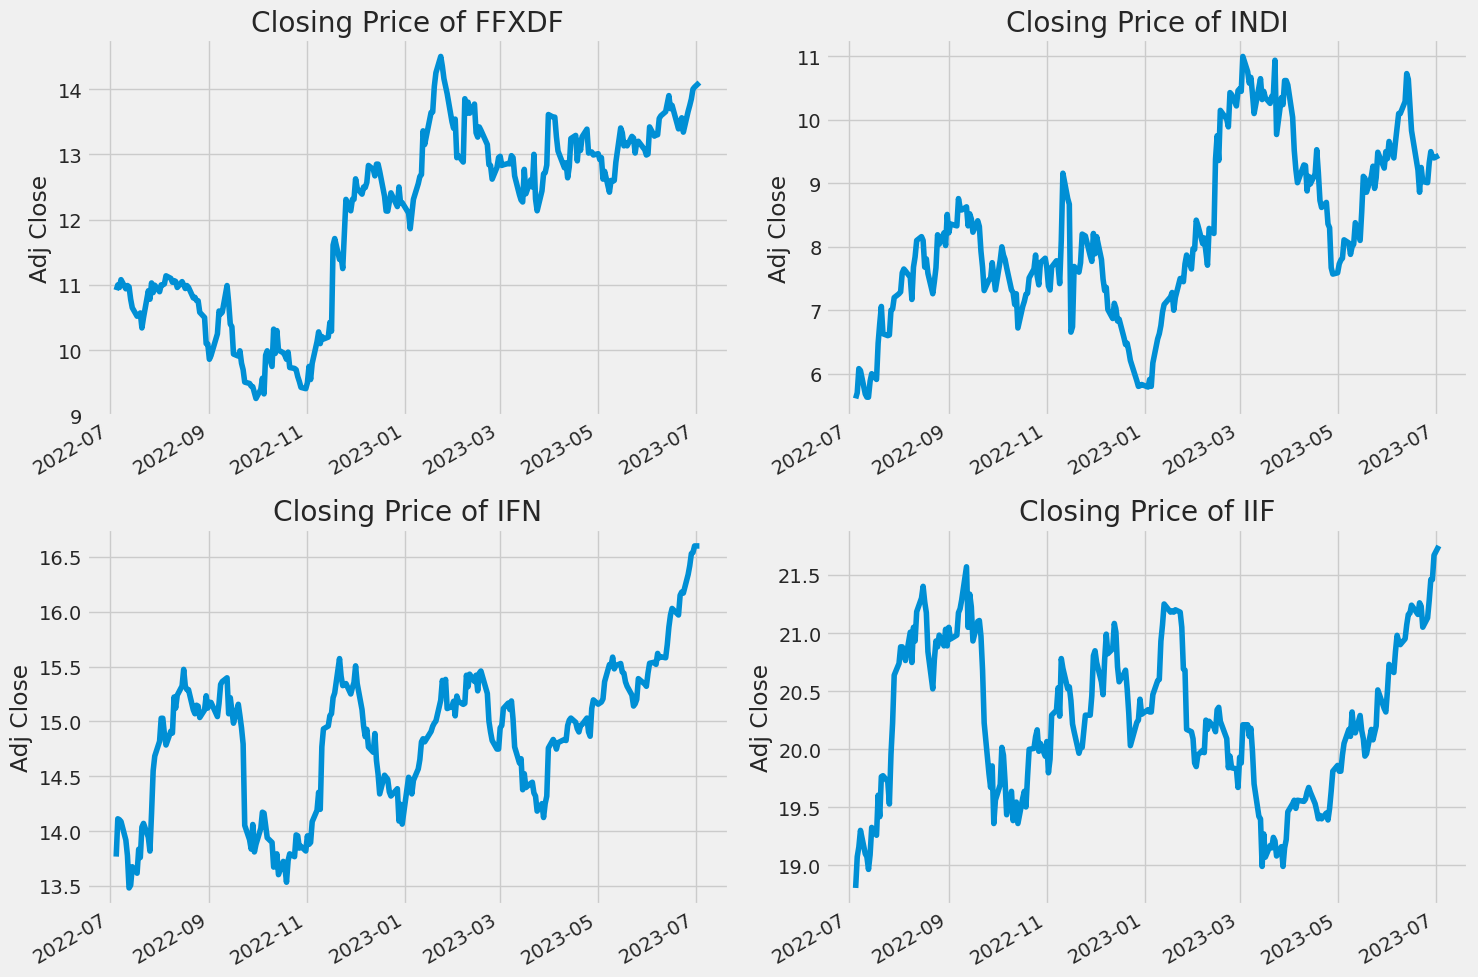

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {stock_list[i - 1]}")

plt.tight_layout()

## Stock being traded each day

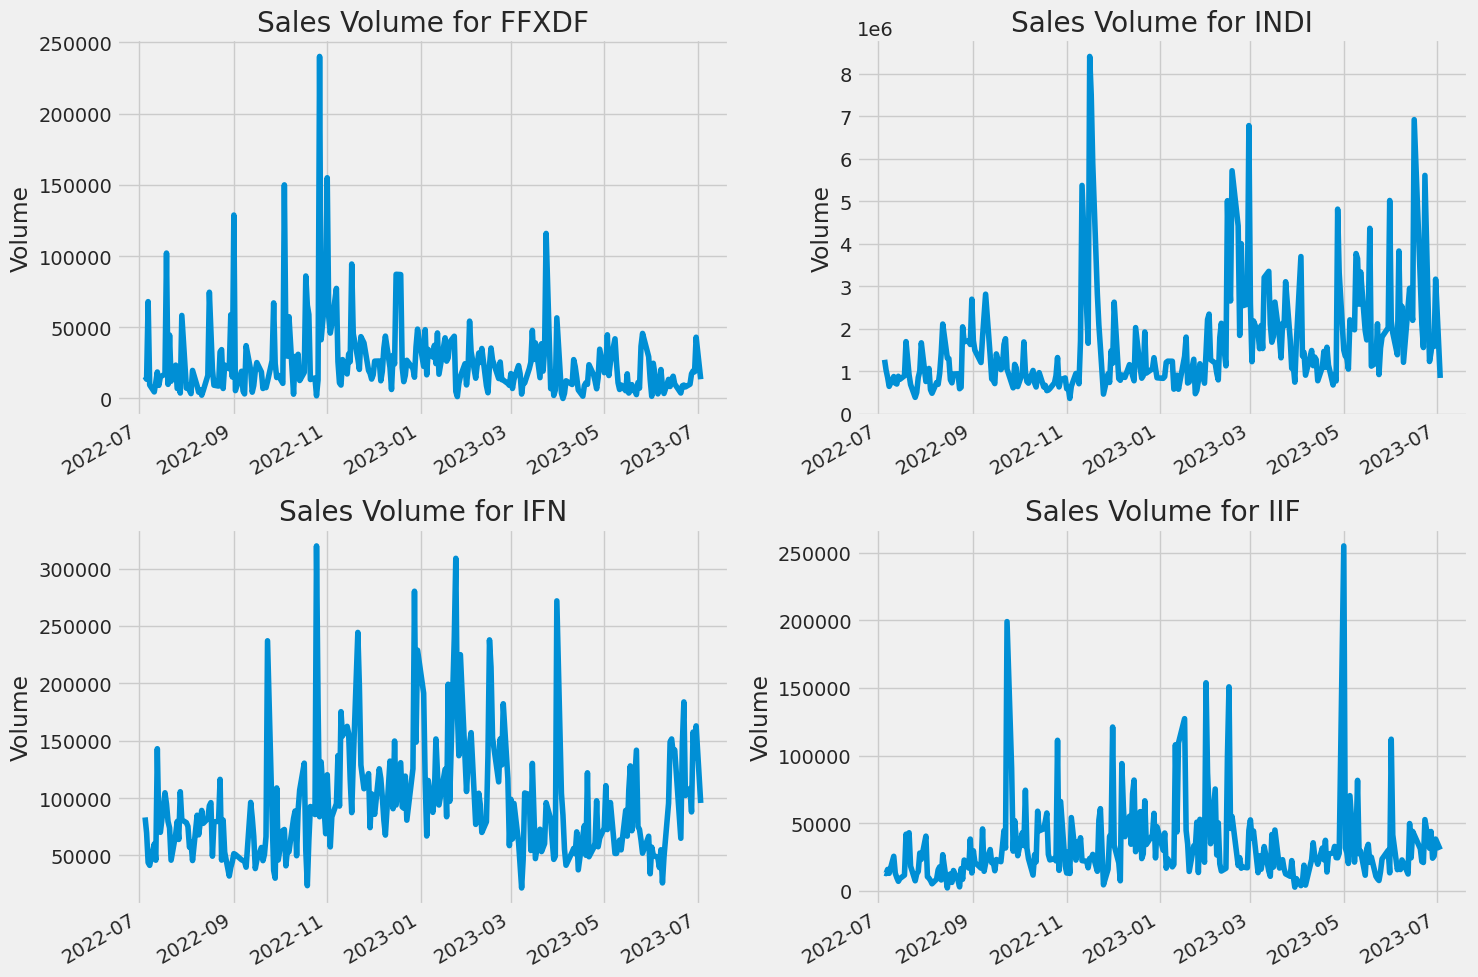

In [ ]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {stock_list[i - 1]}")

plt.tight_layout()

## Moving Average

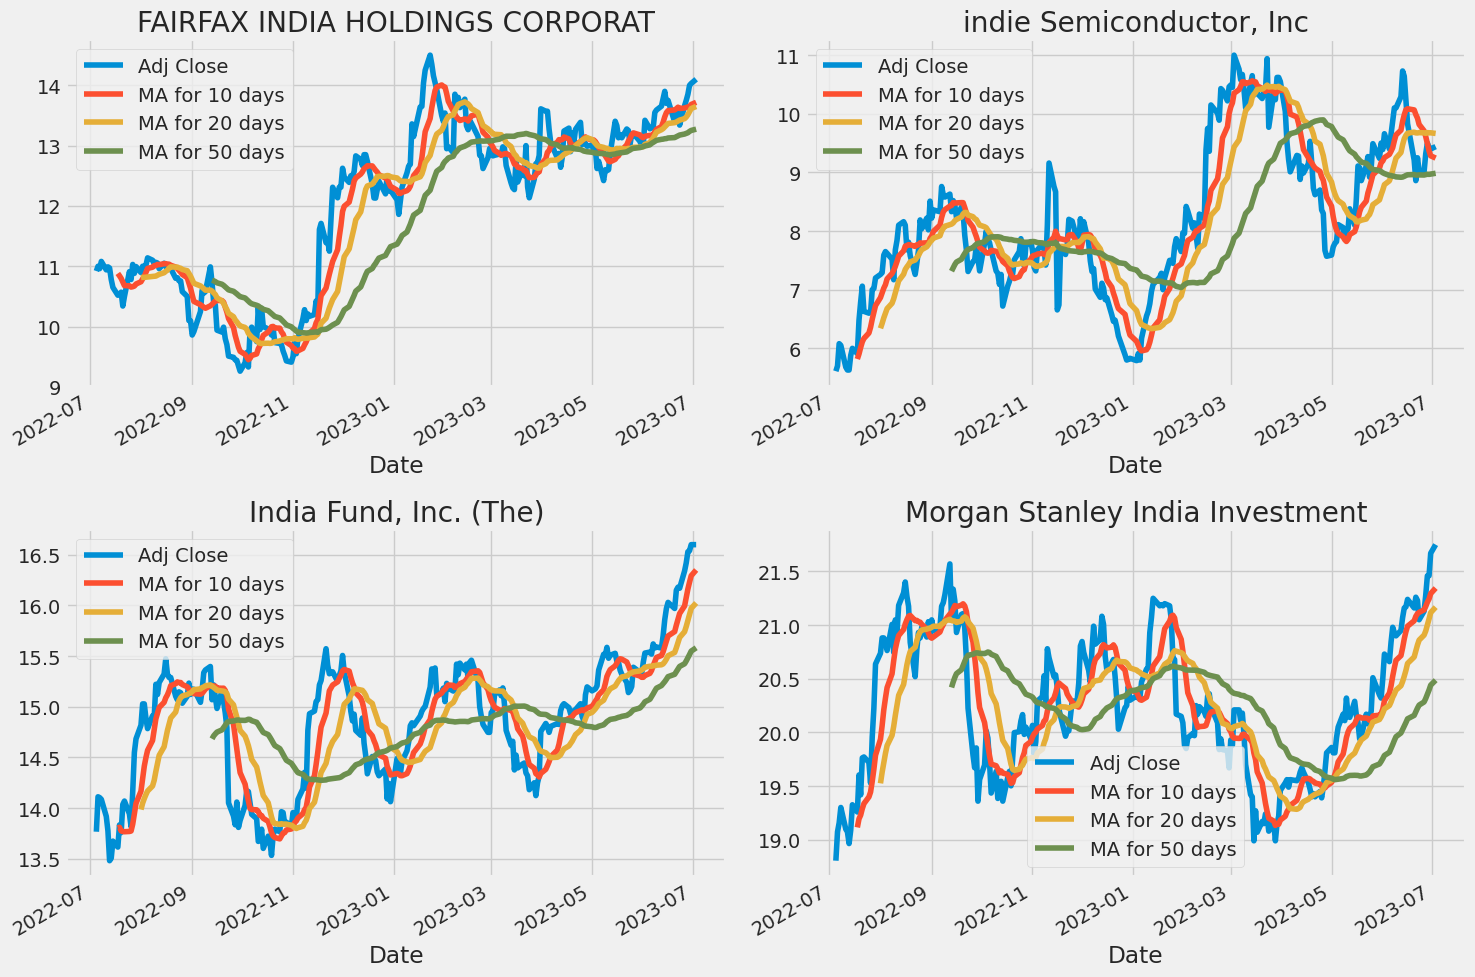

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

FFXDF[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('FAIRFAX INDIA HOLDINGS CORPORAT')

INDI[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('indie Semiconductor, Inc')

IFN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('India Fund, Inc. (The)')

IIF[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('Morgan Stanley India Investment')

fig.tight_layout()

## Daily Return

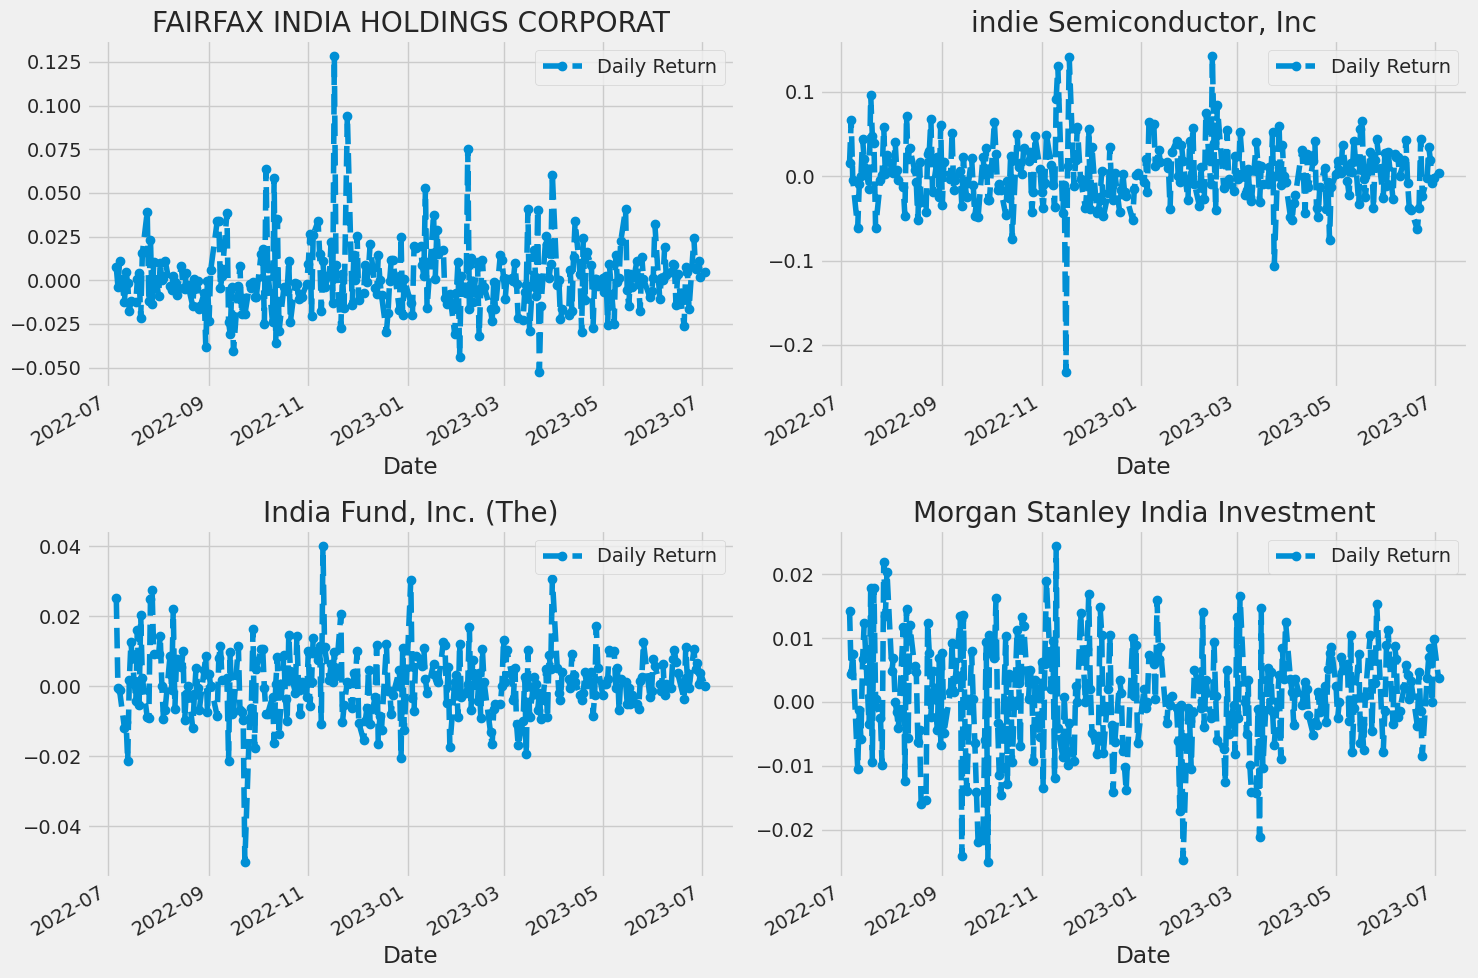

In [ ]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

FFXDF['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('FAIRFAX INDIA HOLDINGS CORPORAT')

INDI['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('indie Semiconductor, Inc')

IFN['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('India Fund, Inc. (The)')

IIF['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('Morgan Stanley India Investment')

fig.tight_layout()

now let's get an overall look at the average daily return using a histogram. We can use seaborn to create both a histogram and kde plot on the same figure.

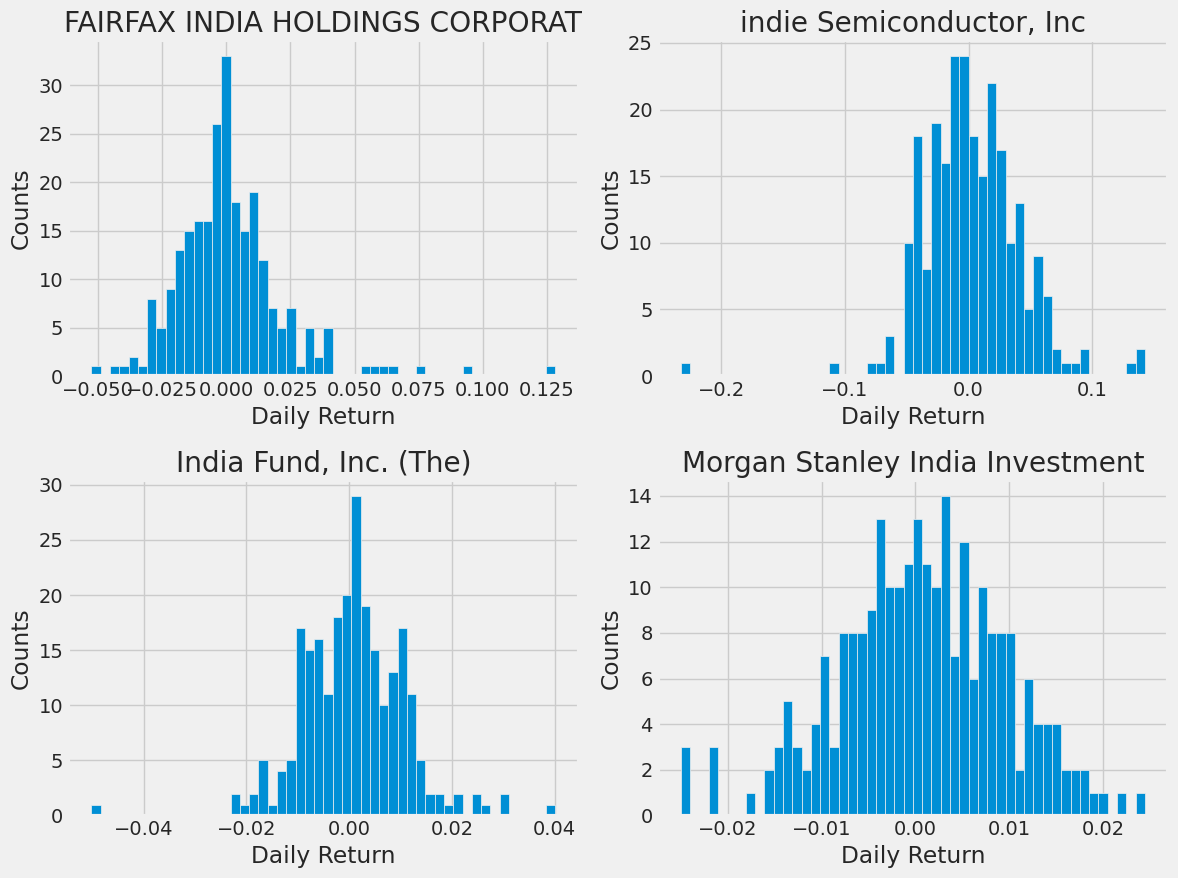

In [ ]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

## What was the correlation between different stocks closing prices?
Correlation is a statistic that measures the degree to which two variables move in relation to each other which has a value that must fall between -1.0 and +1.0. Correlation measures association, but doesn’t show if x causes y or vice versa — or if the association is caused by a third factor[1].

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [22]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(stock_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
stock_rets = closing_df.pct_change()
stock_rets.head()

[*********************100%***********************]  4 of 4 completed


,FFXDF,IFN,IIF,INDI
Date,,,,
2022-07-05,NaN,NaN,NaN,NaN
2022-07-06,0.007326,0.025046,0.014305,0.016043
2022-07-07,-0.003636,-0.000596,0.004407,0.066667
2022-07-08,0.010949,-0.001193,0.007459,-0.004934
2022-07-11,-0.012635,-0.011940,-0.010453,-0.061157


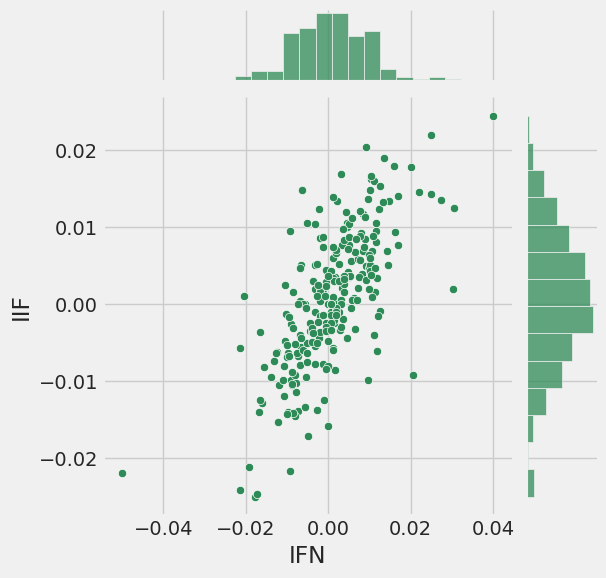

In [23]:
sns.jointplot(x='IFN', y='IIF', data=stock_rets, kind='scatter', color='seagreen')

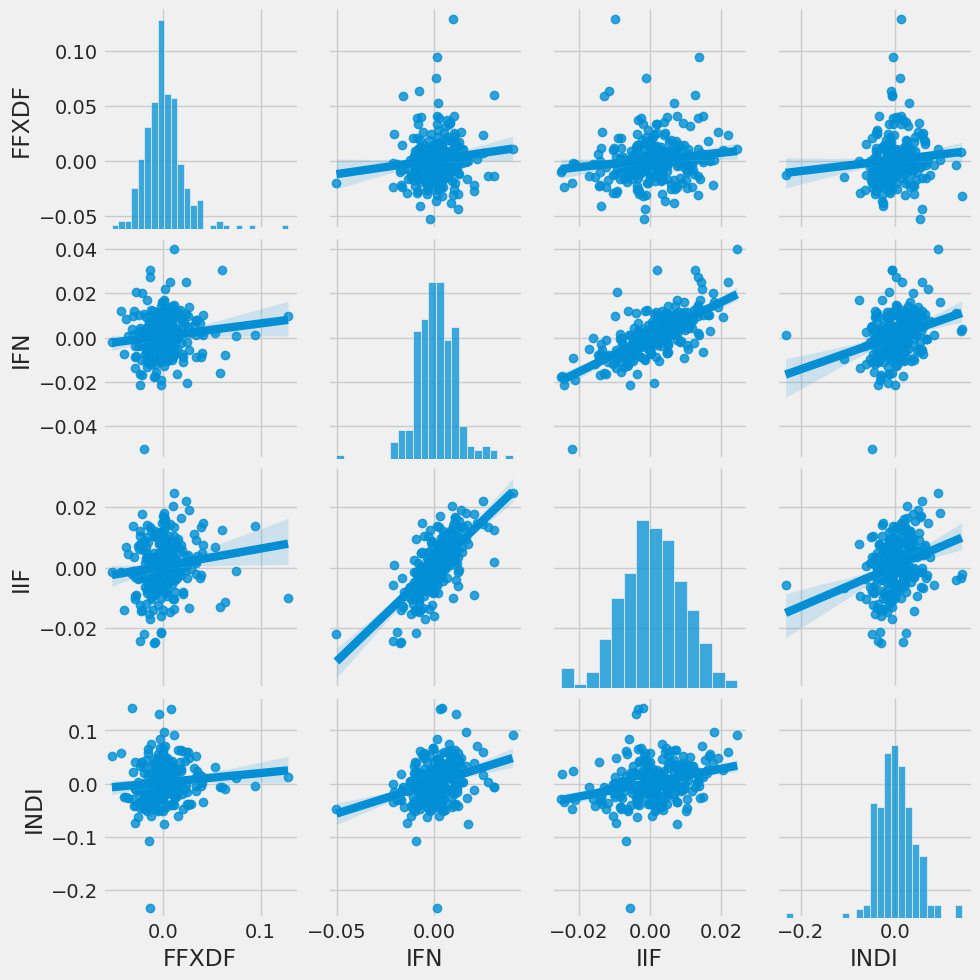

In [24]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons

sns.pairplot(stock_rets, kind='reg')

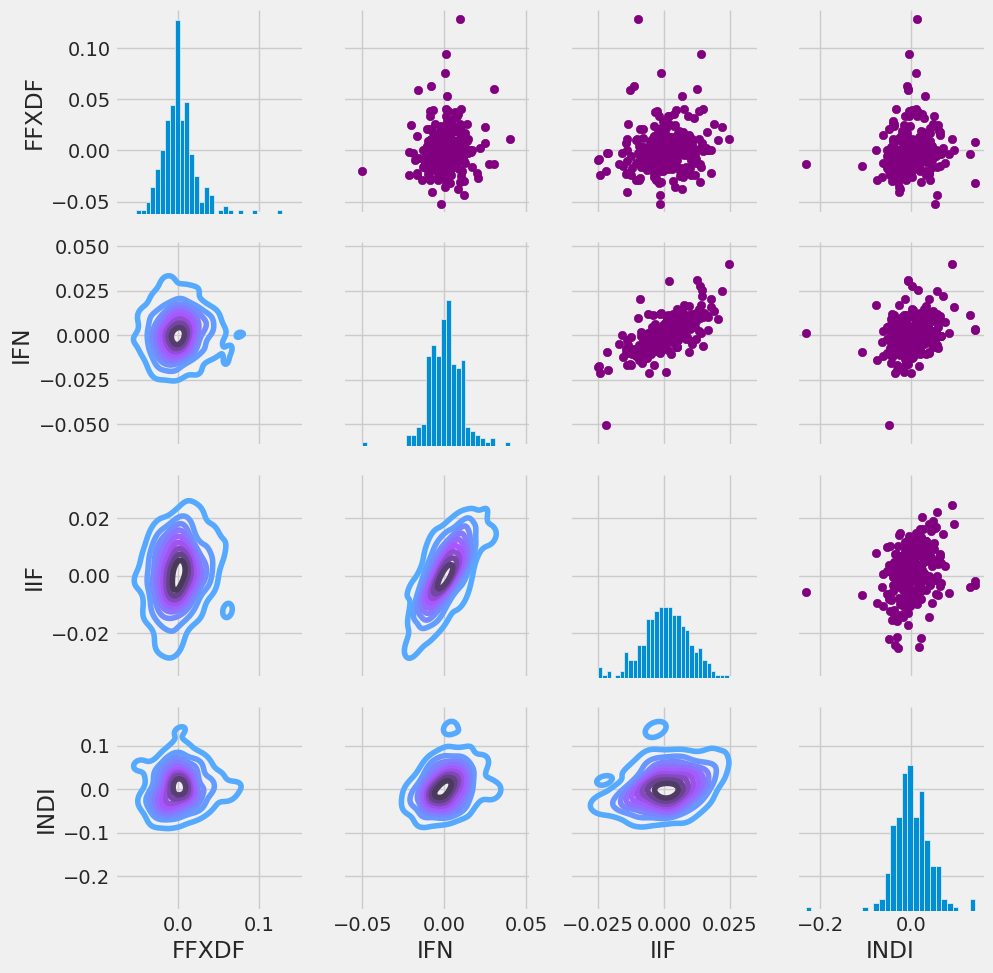

In [25]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(stock_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

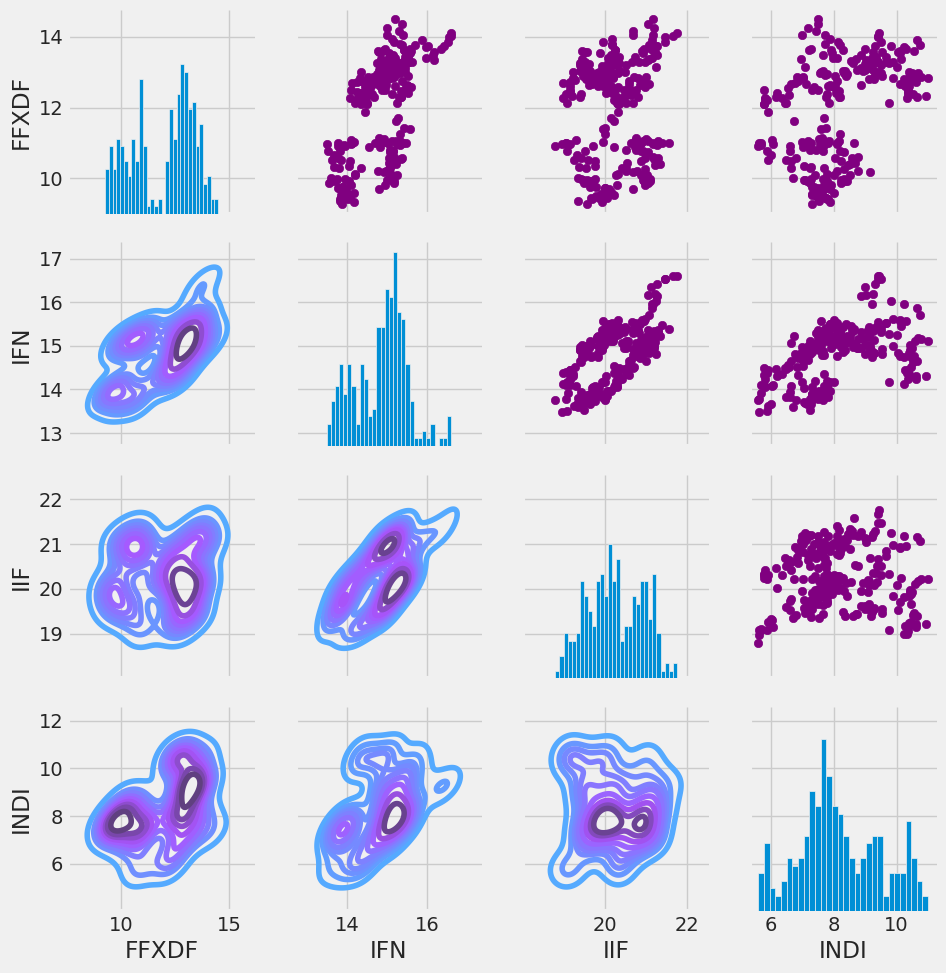

In [26]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

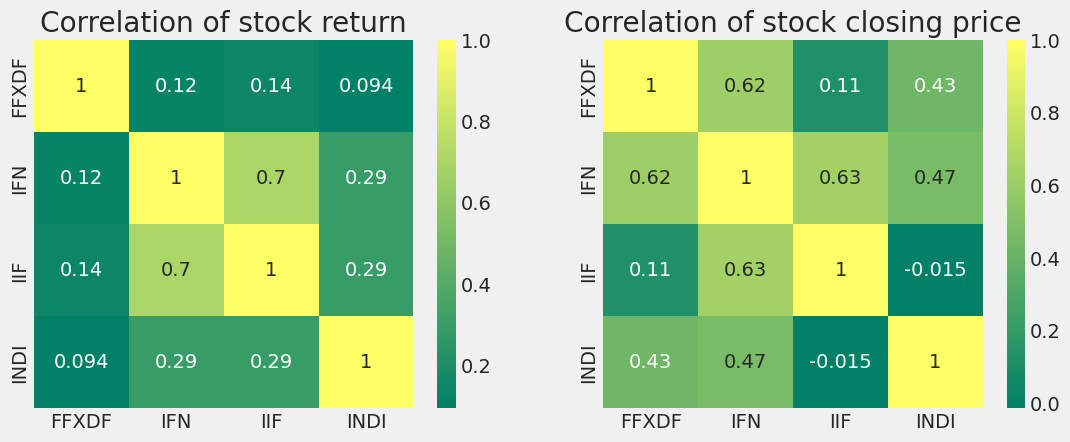

In [27]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

## How much value do we put at risk by investing in a particular stock?

comparing the expected return with the standard deviation of the daily returns.

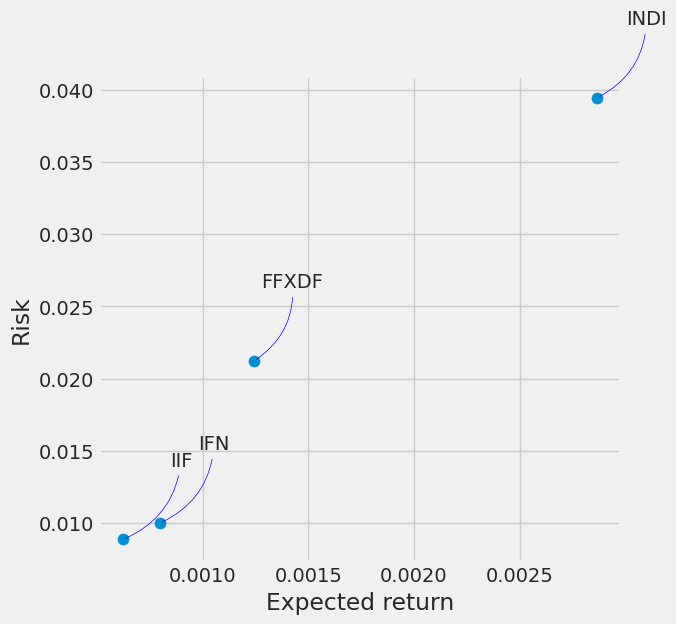

In [36]:
rets = stock_rets.dropna()



plt.figure(figsize=(6, 6))
plt.scatter(rets.mean(), rets.std(), s= np.pi * 20)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

## Predicting the closing price stock price of INDI:

In [39]:
df = pdr.get_data_yahoo('INDI', start='2019-10-04', end=datetime.now()) #the IPO opened on 04/10/2019
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-10-04,9.775,9.80,9.775,9.80,9.80,436000
2019-10-07,9.790,9.79,9.790,9.79,9.79,250000
2019-10-08,9.830,9.83,9.790,9.80,9.80,6400
2019-10-09,9.790,9.81,9.790,9.80,9.80,325700
2019-10-10,9.800,9.90,9.800,9.89,9.89,79100


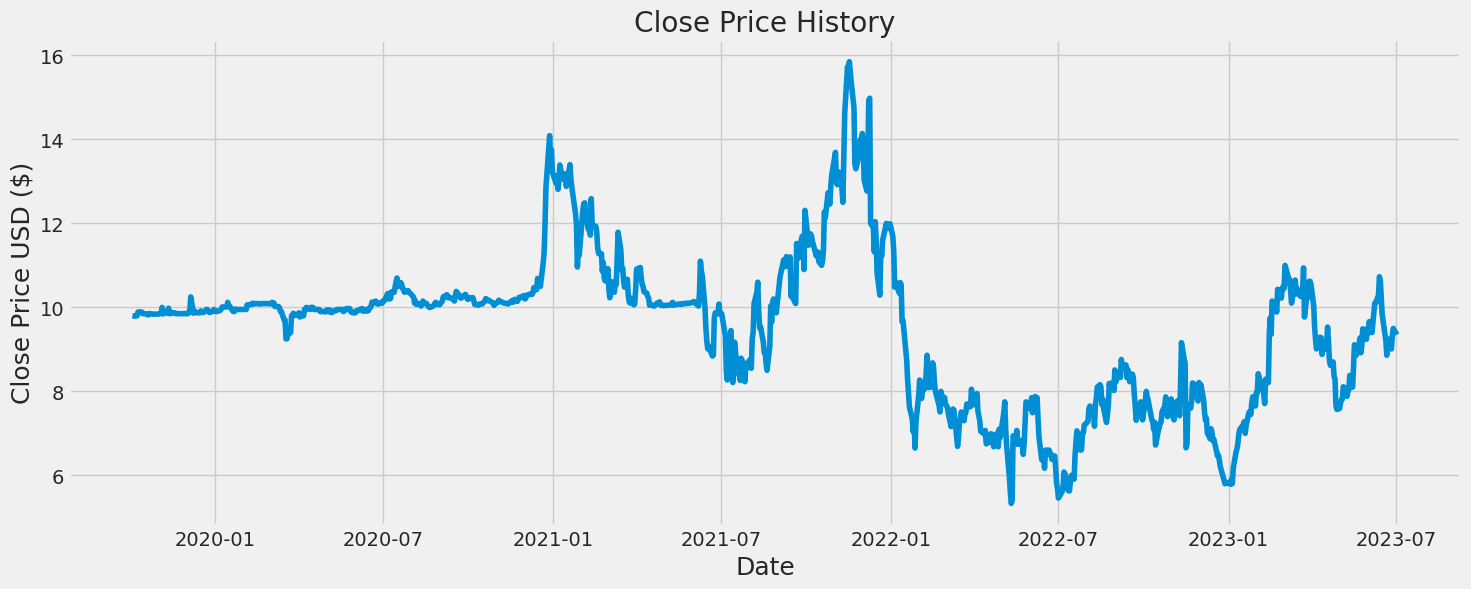

In [40]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [41]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

895

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

In [43]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.42490495, 0.42395436, 0.42490495, 0.42490495, 0.4334601 ,
       0.4334601 , 0.4334601 , 0.42965782, 0.42965782, 0.42965782,
       0.42965782, 0.42680604, 0.42965782, 0.42965782, 0.42965782,
       0.42870723, 0.42870723, 0.42870723, 0.42870723, 0.42870723,
       0.42870723, 0.43060832, 0.44391634, 0.42880223, 0.4344106 ,
       0.43250951, 0.43060832, 0.44201515, 0.42965782, 0.42965782,
       0.43250951, 0.43060832, 0.43155891, 0.42965782, 0.42965782,
       0.42965782, 0.42965782, 0.42965782, 0.42965782, 0.42965782,
       0.42965782, 0.42965782, 0.4344106 , 0.4334601 , 0.4676806 ,
       0.43060832, 0.4344106 , 0.4344106 , 0.43250951, 0.43155891,
       0.43155891, 0.43583649, 0.43250951, 0.43250951, 0.43250951,
       0.43916347, 0.43916347, 0.43250951, 0.43250951, 0.43536119])]
[0.4391634681108365]

[array([0.42490495, 0.42395436, 0.42490495, 0.42490495, 0.4334601 ,
       0.4334601 , 0.4334601 , 0.42965782, 0.42965782, 0.42965782,
       0.42965782, 0.42680604, 0.429

In [44]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

835/835 [==============================] - 15s 7ms/step - loss: 0.0048


In [45]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 [==============================] - 1s 12ms/step


0.4759723362088596

<ipython-input-49-598b3c301c72>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


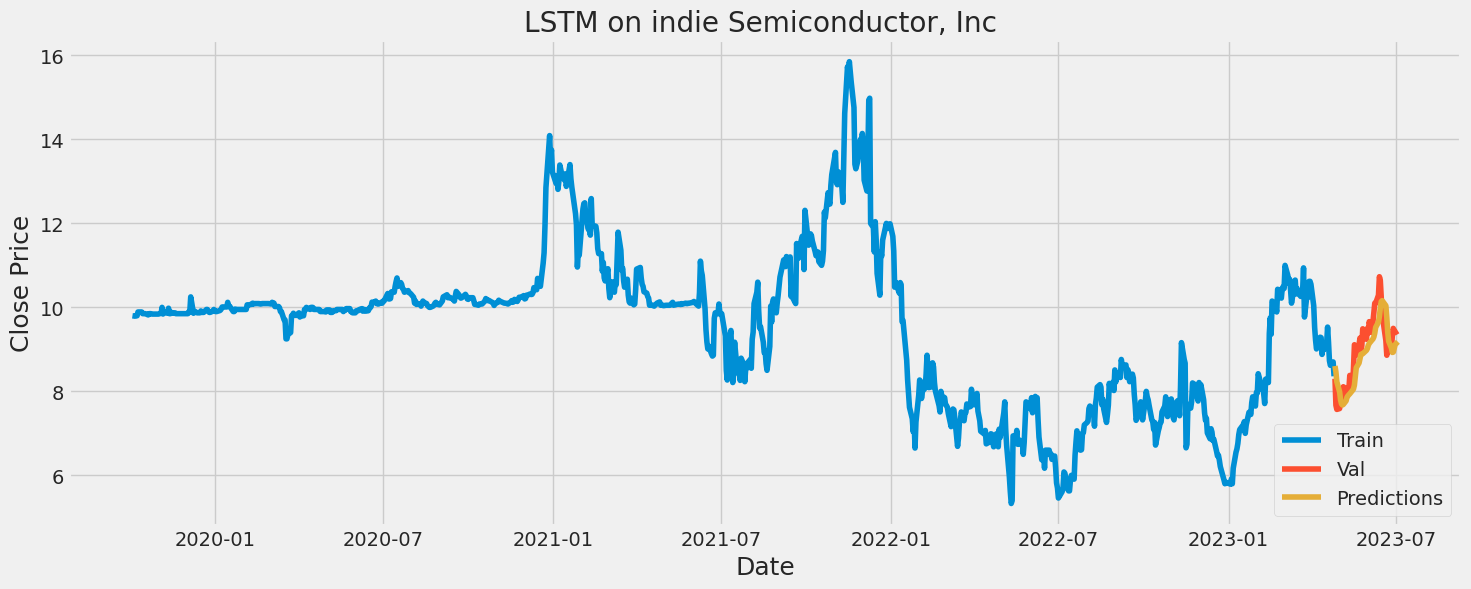

In [49]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('LSTM on indie Semiconductor, Inc ')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [48]:
valid

,Close,Predictions
Date,,
2023-04-26,8.30,8.603845
2023-04-27,7.67,8.460919
2023-04-28,7.57,8.226596
2023-05-01,7.59,7.987557
2023-05-02,7.73,7.801062
2023-05-03,7.79,7.703148
2023-05-04,7.82,7.675035
2023-05-05,8.11,7.688644
2023-05-08,8.06,7.773592
